In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('forestfires.csv')

In [43]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [44]:
df['significant_fire'] = df['area'].apply(lambda x:x!=0)
df['raining'] = df['rain'].apply(lambda x:x!=0)

Text(0.5, 0, 'is raining')

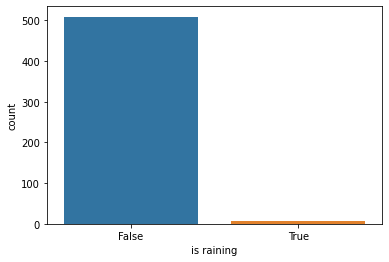

In [49]:
ax = sns.countplot(df,x='raining')
ax.set_xlabel("is raining")

se ta chovendo nunca tem incendio....

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
df = df.astype({"month":'category', "day":'category'})


In [6]:
df.describe(include='all')

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
unique,NaN,NaN,12,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,aug,sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,184,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.669246,4.299807,NaN,NaN,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,NaN,NaN,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,NaN,NaN,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,NaN,NaN,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,NaN,NaN,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,NaN,NaN,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000


<AxesSubplot: xlabel='X', ylabel='Y'>

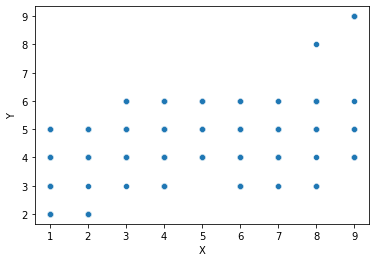

In [7]:
sns.scatterplot(df,x='X',y="Y")

In [8]:
df.month.unique()

['mar', 'oct', 'aug', 'sep', 'apr', ..., 'feb', 'jan', 'dec', 'may', 'nov']
Length: 12
Categories (12, object): ['apr', 'aug', 'dec', 'feb', ..., 'may', 'nov', 'oct', 'sep']

In [9]:
df.day.unique()

['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu']
Categories (7, object): ['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed']

<AxesSubplot: xlabel='day', ylabel='count'>

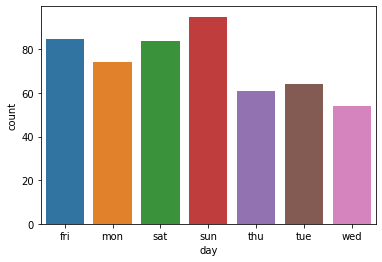

In [10]:
sns.countplot(df,x='day')

<AxesSubplot: xlabel='month', ylabel='count'>

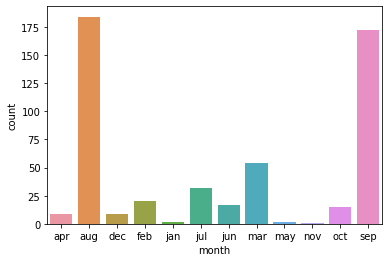

In [11]:
sns.countplot(df,x='month')

### march august and september have most of the occurrences

# hists/boxplots

## Temp

<AxesSubplot: >

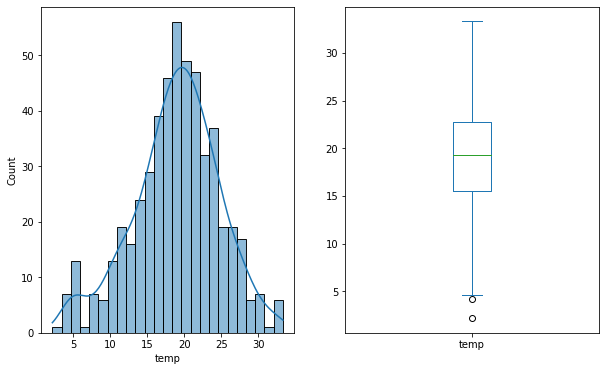

In [12]:
fig, axs = plt.subplots(1,2,figsize=(10,6))

sns.histplot(x=df['temp'],ax=axs[0],bins=25,kde=True)
df.temp.plot(ax=axs[1],kind='box')

## FFMC

<AxesSubplot: title={'center': 'same as left boxplot but without fliers'}>

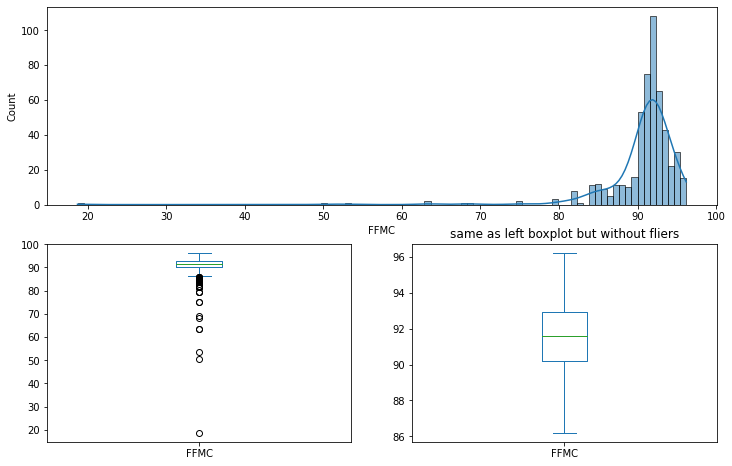

In [13]:

fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=1)

sns.histplot(x=df['FFMC'],ax=ax1,bins=100,kde=True)
df.FFMC.plot(ax=ax2,kind='box')
df.FFMC.plot(ax=ax3,title='same as left boxplot but without fliers',kind='box',showfliers=False)

## DMC

<AxesSubplot: >

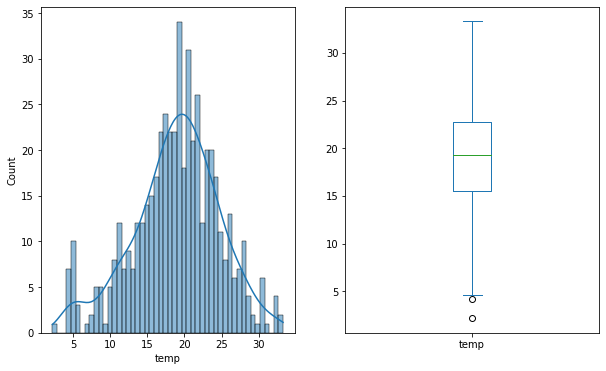

In [14]:
fig, axs = plt.subplots(1,2,figsize=(10,6))

sns.histplot(x=df['temp'],ax=axs[0],bins=50,kde=True)
df.temp.plot(ax=axs[1],kind='box')

## DC

<AxesSubplot: >

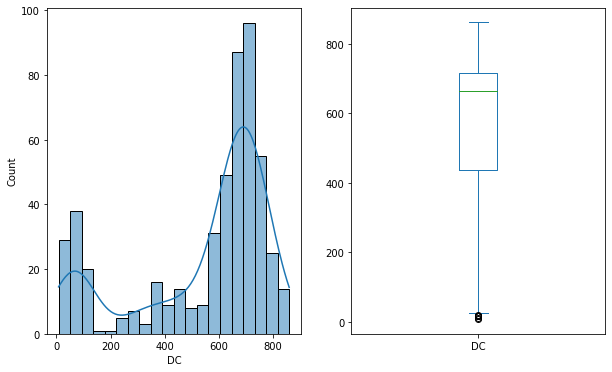

In [15]:
fig, axs = plt.subplots(1,2,figsize=(10,6))

sns.histplot(x=df['DC'],ax=axs[0],bins=20,kde=True)
df.DC.plot(ax=axs[1],kind='box')

## ISI

<AxesSubplot: >

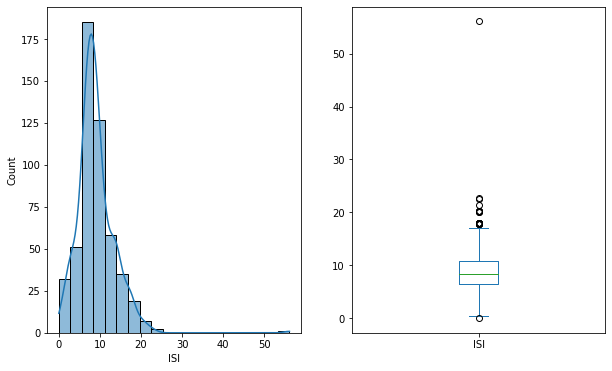

In [16]:
fig, axs = plt.subplots(1,2,figsize=(10,6))

sns.histplot(x=df['ISI'],ax=axs[0],bins=20,kde=True)
df.ISI.plot(ax=axs[1],kind='box')

## RH

<AxesSubplot: >

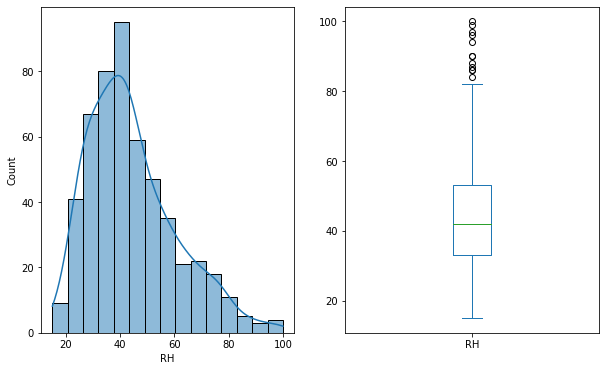

In [17]:
fig, axs = plt.subplots(1,2,figsize=(10,6))

sns.histplot(x=df['RH'],ax=axs[0],bins=15,kde=True)
df.RH.plot(ax=axs[1],kind='box')

## wind

<AxesSubplot: >

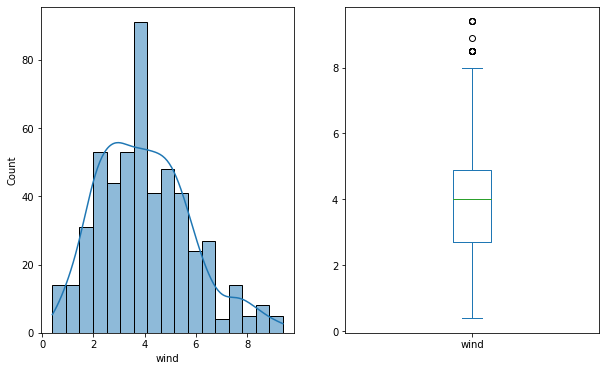

In [18]:
fig, axs = plt.subplots(1,2,figsize=(10,6))

sns.histplot(x=df['wind'],ax=axs[0],kde=True)
df.wind.plot(ax=axs[1],kind='box')

## area

<AxesSubplot: title={'center': 'same as left boxplot but without fliers'}>

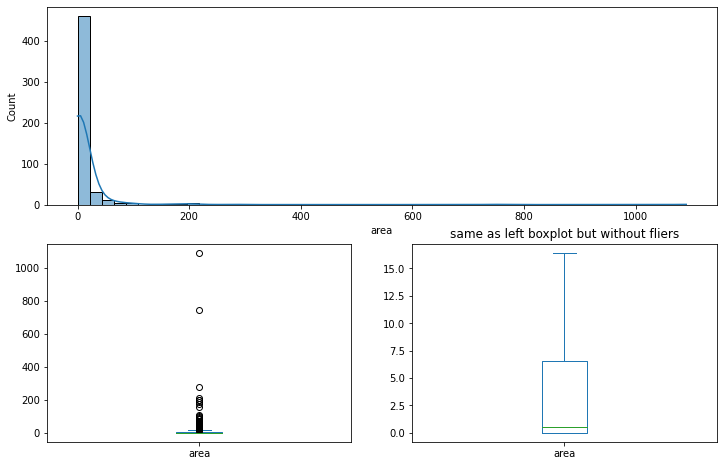

In [19]:

fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=1)

sns.histplot(x=df['area'],ax=ax1,bins=50,kde=True)
df.area.plot(ax=ax2,kind='box')
df.area.plot(ax=ax3,title='same as left boxplot but without fliers',kind='box',showfliers=False)

<AxesSubplot: >

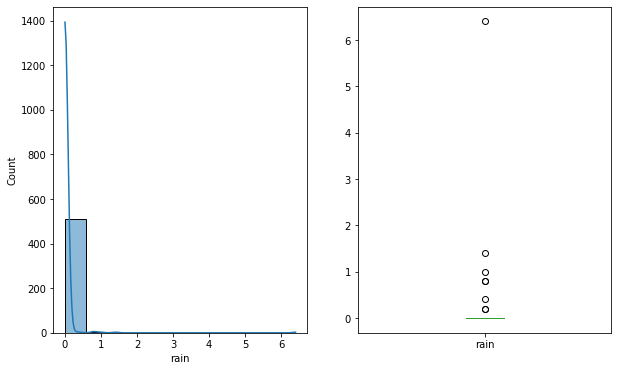

In [20]:
fig, axs = plt.subplots(1,2,figsize=(10,6))

sns.histplot(x=df['rain'],ax=axs[0],kde=True)
df.rain.plot(ax=axs[1],kind='box')

# Removendo outliers

In [21]:
from sklearn.ensemble import IsolationForest
detector = IsolationForest(max_samples=100)
detector.fit(df.drop(['day','month'],axis=1))

IsolationForest(max_samples=100)

In [22]:
scores = detector.predict(df.drop(['day','month'],axis=1))
df['outlier'] = scores

In [23]:
df = df[df['outlier']!=-1]

In [24]:
df.drop("outlier",axis=1,inplace=True)

In [25]:
len(df)

420

# final visualization

### tmp

<AxesSubplot: >

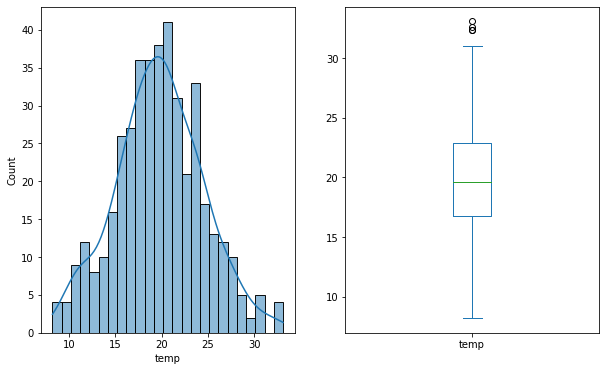

In [26]:
fig, axs = plt.subplots(1,2,figsize=(10,6))

sns.histplot(x=df['temp'],ax=axs[0],bins=25,kde=True)
df.temp.plot(ax=axs[1],kind='box')

### FFMC

<AxesSubplot: title={'center': 'same as left boxplot but without fliers'}>

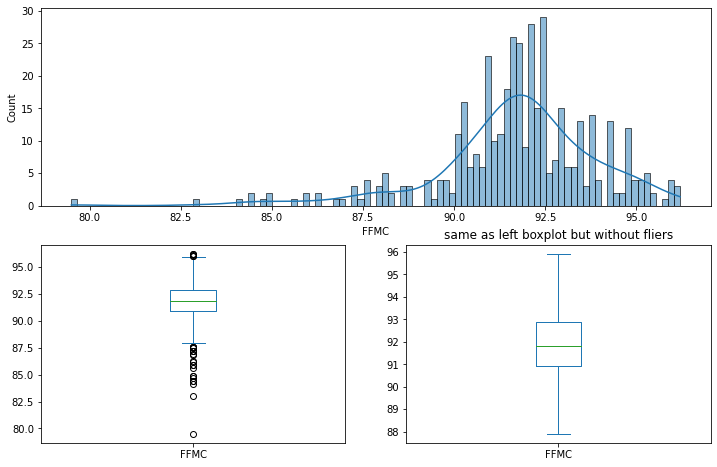

In [27]:

fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=1)

sns.histplot(x=df['FFMC'],ax=ax1,bins=100,kde=True)
df.FFMC.plot(ax=ax2,kind='box')
df.FFMC.plot(ax=ax3,title='same as left boxplot but without fliers',kind='box',showfliers=False)

### DMC

<AxesSubplot: >

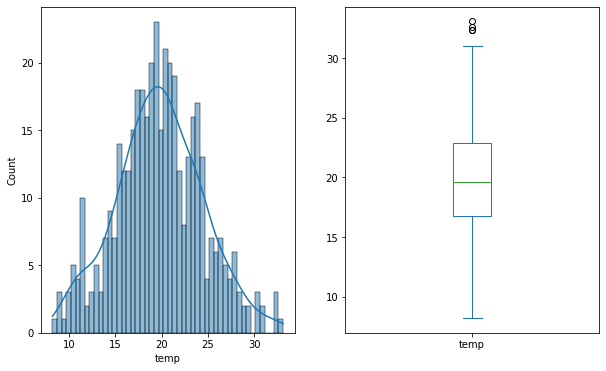

In [28]:
fig, axs = plt.subplots(1,2,figsize=(10,6))

sns.histplot(x=df['temp'],ax=axs[0],bins=50,kde=True)
df.temp.plot(ax=axs[1],kind='box')

### DC

<AxesSubplot: >

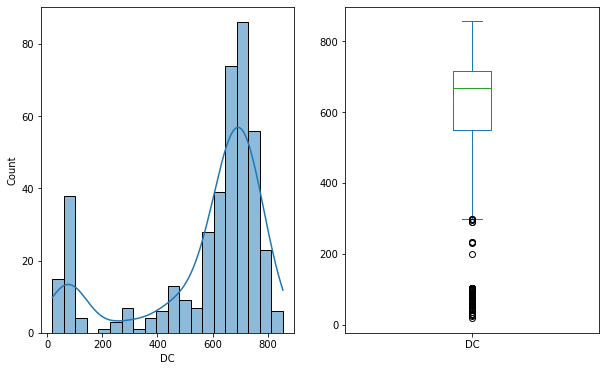

In [29]:
fig, axs = plt.subplots(1,2,figsize=(10,6))

sns.histplot(x=df['DC'],ax=axs[0],bins=20,kde=True)
df.DC.plot(ax=axs[1],kind='box')

### ISI

<AxesSubplot: >

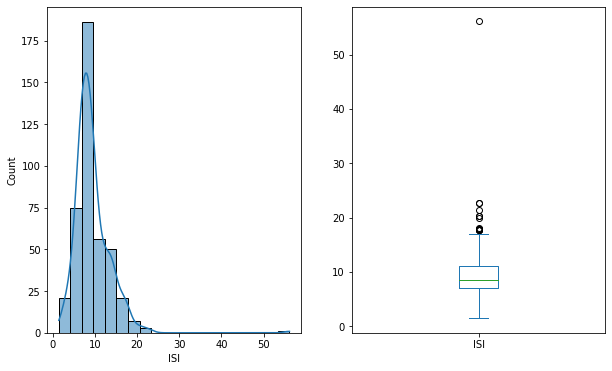

In [30]:
fig, axs = plt.subplots(1,2,figsize=(10,6))

sns.histplot(x=df['ISI'],ax=axs[0],bins=20,kde=True)
df.ISI.plot(ax=axs[1],kind='box')

### RH

<AxesSubplot: >

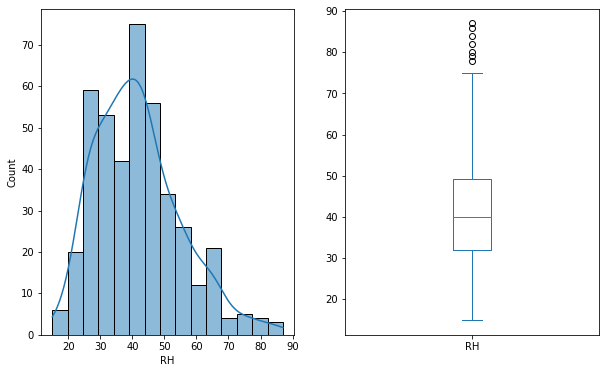

In [31]:
fig, axs = plt.subplots(1,2,figsize=(10,6))

sns.histplot(x=df['RH'],ax=axs[0],bins=15,kde=True)
df.RH.plot(ax=axs[1],kind='box')

### wind

<AxesSubplot: >

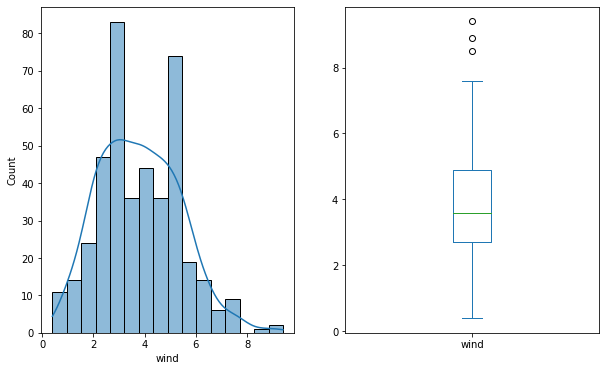

In [32]:
fig, axs = plt.subplots(1,2,figsize=(10,6))

sns.histplot(x=df['wind'],ax=axs[0],kde=True)
df.wind.plot(ax=axs[1],kind='box')

### area

<AxesSubplot: title={'center': 'same as left boxplot but without fliers'}>

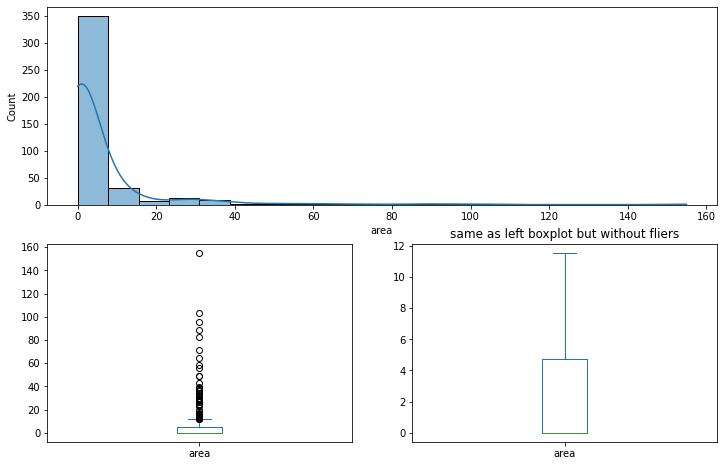

In [33]:

fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=1)

sns.histplot(x=df['area'],ax=ax1,bins=20,kde=True)
df.area.plot(ax=ax2,kind='box')
df.area.plot(ax=ax3,title='same as left boxplot but without fliers',kind='box',showfliers=False)

<AxesSubplot: >

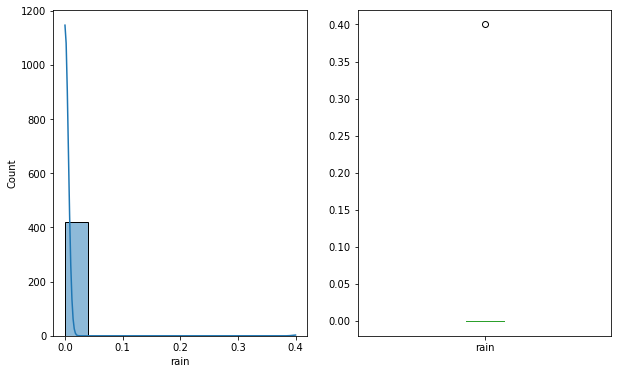

In [34]:
fig, axs = plt.subplots(1,2,figsize=(10,6))

sns.histplot(x=df['rain'],ax=axs[0],kde=True)
df.rain.plot(ax=axs[1],kind='box')

## Pairplots

/home/vtex/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/home/vtex/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k

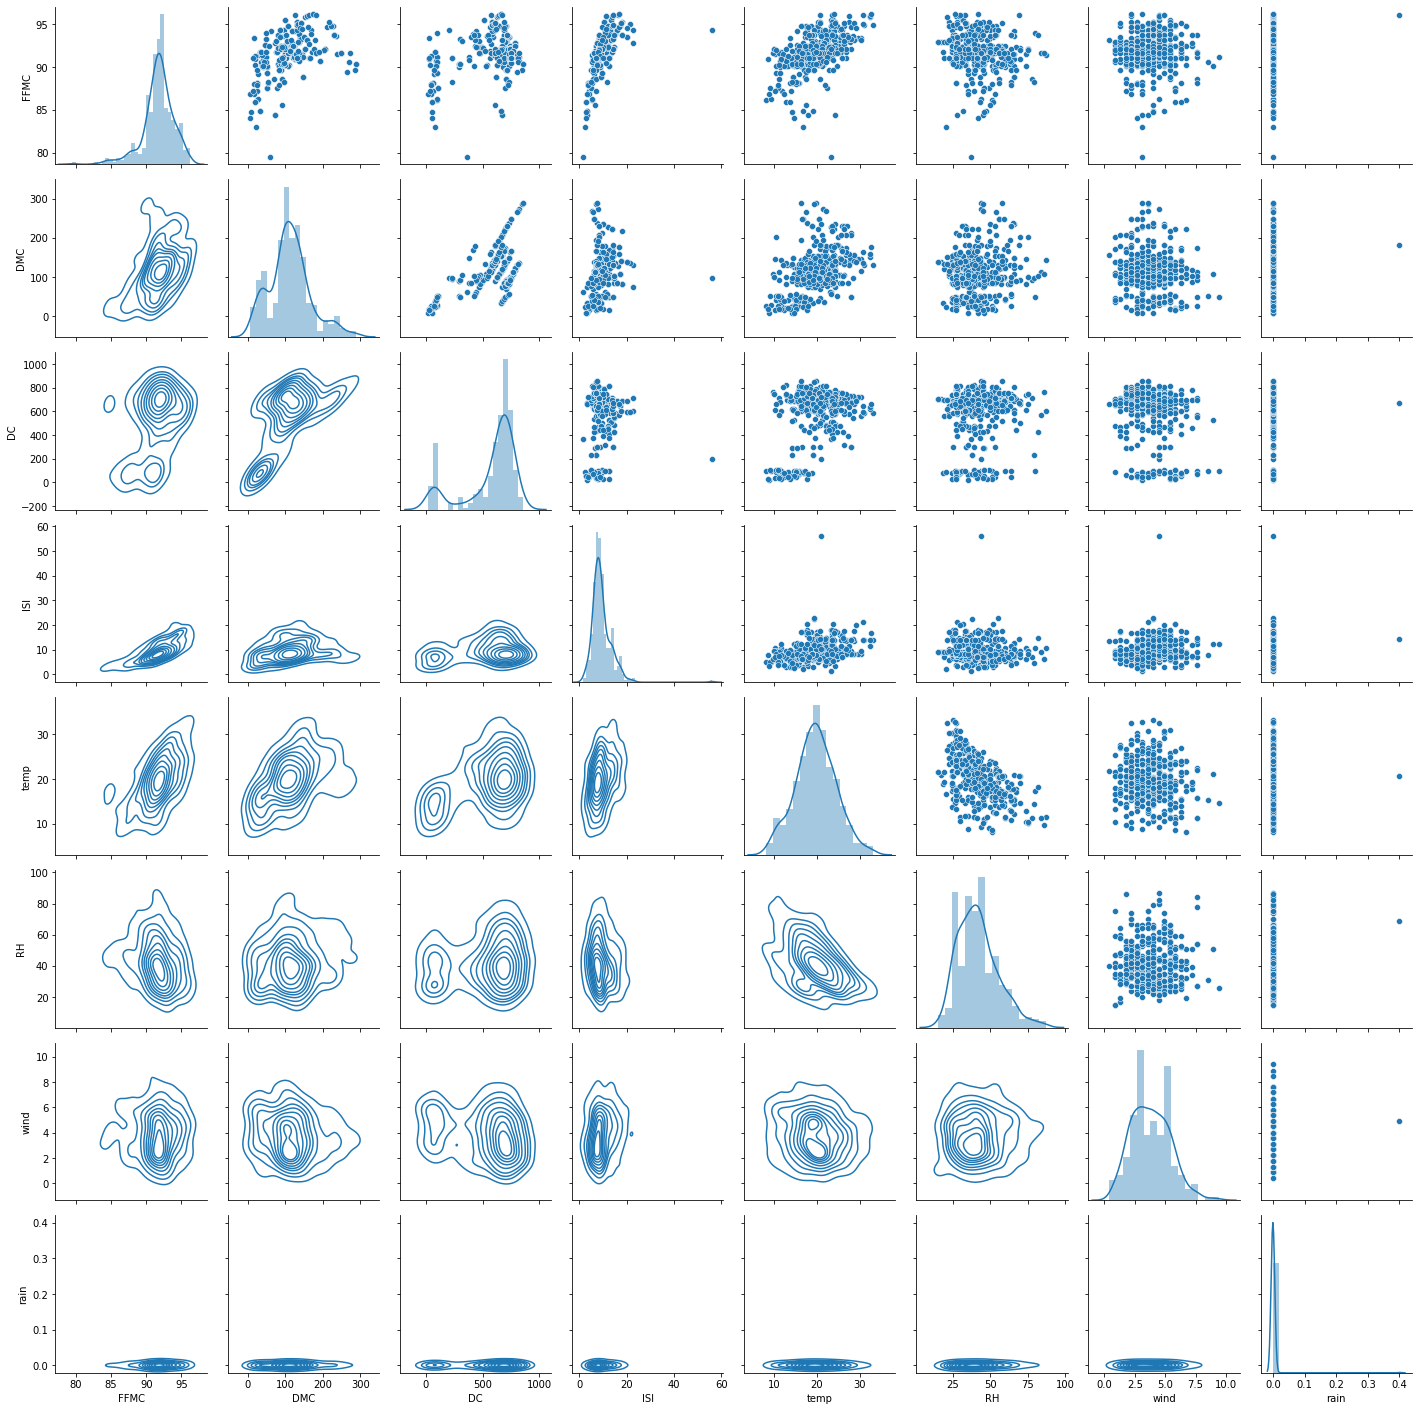

In [35]:
g = sns.PairGrid(df.drop(['X','Y','area'],axis=1), diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.distplot)
#sns.pairplot(,upper_kind='kde')

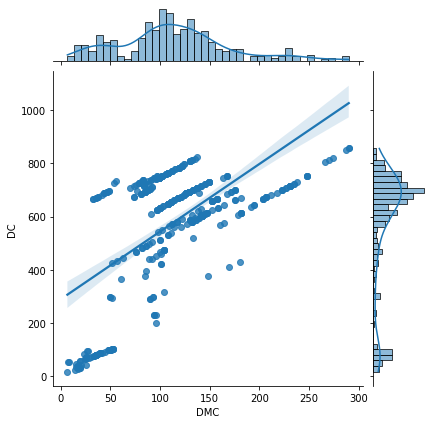

In [36]:
sns.jointplot(df,x='DMC',y='DC',kind='reg',marginal_kws={'bins':40})

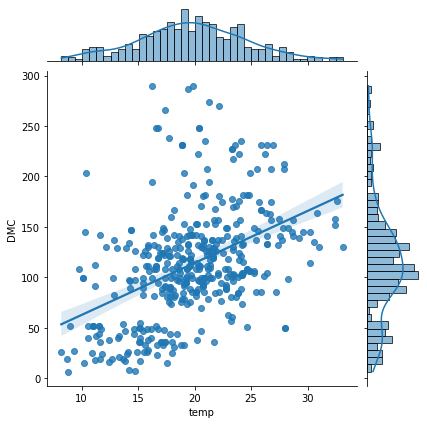

In [37]:
sns.jointplot(df,x='temp',y='DMC',kind='reg',marginal_kws={'bins':40})

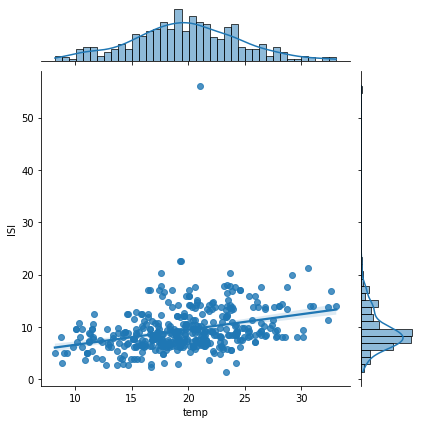

In [38]:
sns.jointplot(df,x='temp',y='ISI',kind='reg',marginal_kws={'bins':40})

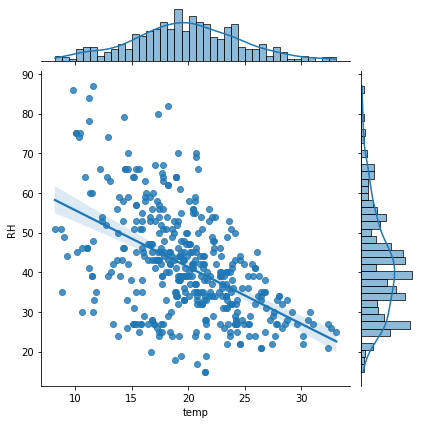

In [39]:
sns.jointplot(df,x='temp',y='RH',kind='reg',marginal_kws={'bins':40})